In [1]:
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
from openpiv import tools, pyprocess, validation, filters, scaling 

In [2]:
folder = '/home/user/PIV/PIV-main'

    
Data = np.genfromtxt(folder + '/Vector_field/exp1_meanField.txt',
    delimiter='	',
    names=True,
    dtype=None)

np.genfromtxt(folder + '/Vector_field/exp1_meanField.txt',
    delimiter='	',
    names=True,
    dtype=None)

array([( 0.8793,  0.9694, 0.0103, -0.0281, 0., 0.),
       ( 1.24  ,  0.9694, 0.013 , -0.0258, 0., 0.),
       ( 1.6007,  0.9694, 0.0182, -0.0252, 0., 0.), ...,
       (43.0837, 44.256 , 0.0096,  0.0334, 0., 0.),
       (43.4444, 44.256 , 0.0108,  0.0394, 0., 0.),
       (43.8051, 44.256 , 0.0076,  0.0411, 0., 0.)],
      dtype=[('x', '<f8'), ('y', '<f8'), ('u', '<f8'), ('v', '<f8'), ('s2n', '<f8'), ('mask', '<f8')])

In [3]:
# The two-dimensional domain of the fit.
X, Y = Data['x'], Data['y']


# The function to be fit is u [n x m]
u_mean = Data['u']
v_mean = Data['v']

# The mathematical approximation function is U:
def U(x, y, A, B):
  return (A/(x)) * np.exp(-((y)**2)/((B*(x))**2))
# return (A/(x-x0)) * np.exp(-(y-y0)**2/(B*(x-x0)))


# This is the callable that is passed to curve_fit.M is a (2,N) array
# where N is the total number of data points in Z, which will be ravelled
# to one dimension.
def func(M, *args):
  xx, yy = M
  arr = np.zeros(xx.shape)
  arr += U(xx, yy, *args)
  return arr

# origin of the nozzle
x0 = 45/2 + 80  # 45/2 sarebbe il centro della finestra + 80mm distanza dall'ugello [ref PIV challenge]
y0 = 45/2       # CHECK!!!!!!!!!!!!!!!!!


In [4]:
# Initial guess of the parameters
u_max = max(u_mean)
max_index = np.where(u_mean == u_max)

A0 = 1
B0 = 1
p0 = [A0, B0]


In [5]:
# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
coord = np.vstack((-X + x0, Y - y0))

# LEAST SQUARES
p_opt, p_cov = curve_fit(func, coord, u_mean, p0)
# delta = 1000
 #while delta > 70:
 #   p_opt, p_cov = curve_fit(func, coord, u_mean, p_opt)
  #  delta = abs(p_opt[0] - p0[0])

print('Fitted parameters:')
print(p_opt)


Fitted parameters:
[-2.45636348e+02  9.77033256e-02]


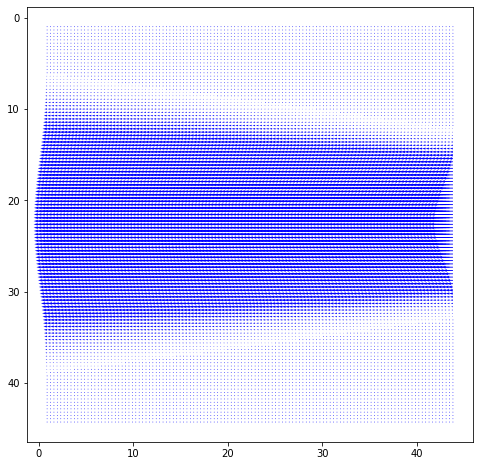

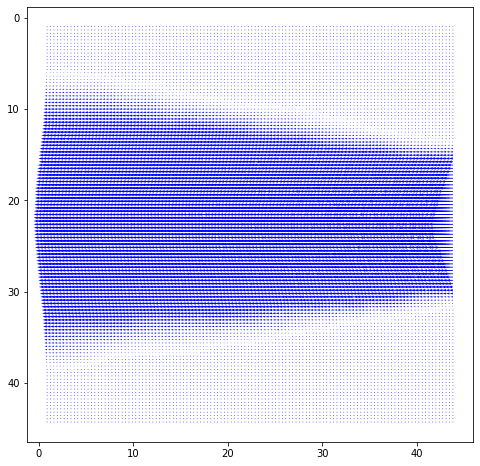

In [6]:
# Camera
resolution = (992,1004) #pixel
physical_window = (45,45) # m
scaling_factor = 1/(np.mean(physical_window)/np.mean(resolution)) # m/pixel




#save in the simple ASCII table format
vmean = np.zeros(X.shape)
mask = np.zeros(X.shape, dtype=bool)
snr = np.zeros(X.shape)
U_mean = func(coord, p_opt[0], p_opt[1])
tools.save(X, Y, U_mean, vmean, snr, mask, folder + '/Vector_field/' + 'testLS_th.txt' )
tools.save(X, Y, u_mean, vmean, snr, mask, folder + '/Vector_field/' + 'testLS_exp.txt' )

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/Vector_field/' + 'testLS_th.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 80, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/Vector_field/' + 'testLS_exp.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 80, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');

In [7]:
#fit = np.zeros(Z.shape)
#fit +=  U(X, Y, x0, y0, p_opt[0], p_opt[1])
rms = np.sqrt(np.mean((u_mean - U_mean)**2))
print('RMS residual =', rms)

RMS residual = 0.07809195241824478


In [8]:
# mean centerline  velocity
# A == p_opt[0]
def U_centerline(x, x0, A):
  return A/(x-x0) 

# mean jet width
# B == p_opt[1]
def jet_width(x, x0, B):
  return B*(x-x0) 

# reduced radial coordinate
def similarity_variable(y, y0, *args):
  width = args
  return (y-y0)/width 

In [9]:
# My field 
x1 = X[0]
y1 = Y[0]
n = np.sum(X==x1)
m = np.sum(Y==y1)

print(n)
print(m)

121
120


In [10]:
X_1 = X.reshape(n,m)
print(X_1)

print()
print()
print()

Y_1 = Y.reshape(n,m)
print(Y_1)

print()
print()
print()

U_1 = u_mean.reshape(n,m)
print(U_1)

print()
print()
print()

V_1 = v_mean.reshape(n,m)
print(V_1)

[[ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]
 [ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]
 [ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]
 ...
 [ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]
 [ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]
 [ 0.8793  1.24    1.6007 ... 43.0837 43.4444 43.8051]]



[[ 0.9694  0.9694  0.9694 ...  0.9694  0.9694  0.9694]
 [ 1.3302  1.3302  1.3302 ...  1.3302  1.3302  1.3302]
 [ 1.6909  1.6909  1.6909 ...  1.6909  1.6909  1.6909]
 ...
 [43.5346 43.5346 43.5346 ... 43.5346 43.5346 43.5346]
 [43.8953 43.8953 43.8953 ... 43.8953 43.8953 43.8953]
 [44.256  44.256  44.256  ... 44.256  44.256  44.256 ]]



[[0.0103 0.013  0.0182 ... 0.036  0.0368 0.0395]
 [0.0108 0.0123 0.0151 ... 0.0377 0.0377 0.0388]
 [0.0041 0.0047 0.0061 ... 0.0335 0.0361 0.0371]
 ...
 [0.0483 0.0477 0.0525 ... 0.0054 0.0102 0.0042]
 [0.0522 0.053  0.0581 ... 0.007  0.0111 0.004 ]
 [0.0526 0.057  0.0637 ... 0.0096 0.0108 0.0076]]



[[-0.0281 -0.0258 -

x = 43.8051 mm
x = 22.5225 mm
x = 1.24 mm


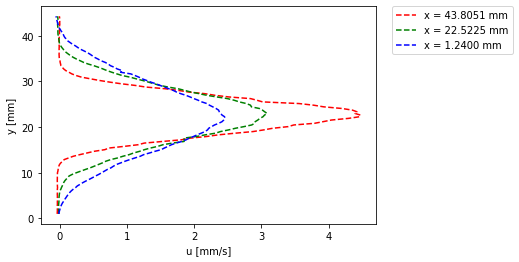

In [17]:
# Plot some velocity profile at different x
m1 = m - 1
x_1 = X_1[0,m1]
print('x =', x_1, 'mm')
y_1 = Y_1[:,0]
u_1 = U_1[:,m1]

m2 = m//2
x_2 = X_1[0,m2]
print('x =', x_2, 'mm')
y_2 = Y_1[:,0]
u_2 = U_1[:,m2]

m3 = 1
x_3 = X_1[0,m3]
print('x =', x_3, 'mm')
y_3 = Y_1[:,0]
u_3 = U_1[:,m3]


plt.plot(-u_1, y_1, 'r--', label='x = %.4f mm' %x_1)
plt.plot(-u_2, y_2, 'g--', label='x = %.4f mm' %x_2)
plt.plot(-u_3, y_3, 'b--', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('u [mm/s]')
plt.ylabel('y [mm]')
plt.show()


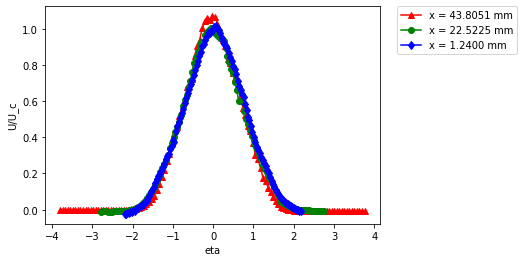

In [18]:
# Plot axial velocity on the similarity variable and adimensionalized by U_c 

U_c = U_centerline(X_1[0,:], x0, p_opt[0])
Width = jet_width(X_1[0,:], x0, p_opt[1])

eta_1 = similarity_variable(Y_1[:,0], y0, Width[m1])
eta_2 = similarity_variable(Y_1[:,0], y0, Width[m2])
eta_3 = similarity_variable(Y_1[:,0], y0, Width[m3])

plt.plot(eta_1, -u_1/U_c[m1], 'r-^', label='x = %.4f mm' %x_1)
plt.plot(eta_2, -u_2/U_c[m2], 'g-o', label='x = %.4f mm' %x_2)
plt.plot(eta_3, -u_3/U_c[m3], 'b-d', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()


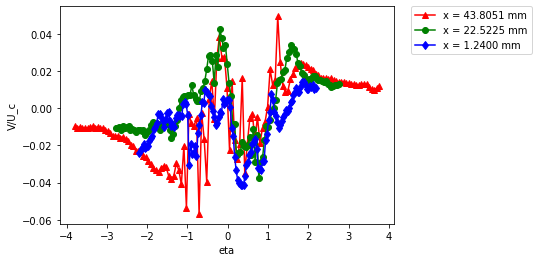

In [19]:
# Plot radial velocity on the similarity variable and adimensionalized by U_c

v_1 = V_1[:,m1]
v_2 = V_1[:,m2]
v_3 = V_1[:,m3]

U_c = U_centerline(X_1[0,:], x0, p_opt[0])
Width = jet_width(X_1[0,:], x0, p_opt[1])

eta_1 = similarity_variable(Y_1[:,0], y0, Width[m1])
eta_2 = similarity_variable(Y_1[:,0], y0, Width[m2])
eta_3 = similarity_variable(Y_1[:,0], y0, Width[m3])

plt.plot(eta_1, -v_1/U_c[m1], 'r-^', label='x = %.4f mm' %x_1)
plt.plot(eta_2, -v_2/U_c[m2], 'g-o', label='x = %.4f mm' %x_2)
plt.plot(eta_3, -v_3/U_c[m3], 'b-d', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('V/U_c')
plt.show()

In [1]:
# Plot rms axial velocity fluctuations on the similarity variable and adimensionalized by U_c